# Instalacja detectron2

In [ ]:
!pip install pyyaml==5.1

import torch
TORCH_VERSION = ".".join(torch.__version__.split(".")[:2])
CUDA_VERSION = torch.__version__.split("+")[-1]
print("torch: ", TORCH_VERSION, "; cuda: ", CUDA_VERSION)
# Install detectron2 that matches the above pytorch version
# See https://detectron2.readthedocs.io/tutorials/install.html for instructions
!pip install detectron2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/$CUDA_VERSION/torch$TORCH_VERSION/index.html
# If there is not yet a detectron2 release that matches the given torch + CUDA version, you need to install a different pytorch.

# exit(0)  # After installation, you may need to "restart runtime" in Colab. This line can also restart runtime

In [ ]:
# Some basic setup:
# Setup detectron2 logger
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import os, json, cv2, random
from google.colab.patches import cv2_imshow

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog

# Załadowanie zbioru Kaggle [3]

dla zbioru kaggle należy dodatkowo załadować pliki z adnotacjami coco json (kaggle_masks_coco_val.json, kaggle_mask_coco_train.json, kaggle_mask_coco_test.json) oraz klucz do appi (kaggle.json)

dla zbiorów połączonych nazwy plików są inne - będą to:
1. kaggle.json
2. merged_git_and_kaggle_COCO_train.json
3. merged_git_and_kaggle_COCO_test.json
4. merged_git_and_kaggle_COCO_val.json

a dla samego zbioru z gita będą to:
1. kaggle.json
2. git_annotations_coco_train.json
3. git_annotations_coco_test.json
4. git_annotations_coco_val.json
 

In [ ]:
! pip install kaggle

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d intelecai/car-segmentation

In [ ]:
! unzip car-segmentation.zip

# Wrzuć zbiór kaggle [3] do folderów train test val

In [ ]:
ONLY_KAGGLE = False

In [ ]:
if ONLY_KAGGLE:
  ! mkdir car
  ! mkdir car/train
  ! mkdir car/val
  ! mkdir car/test

In [ ]:
if ONLY_KAGGLE:
  train_json = "kaggle_masks_coco_train.json"
  val_json = "kaggle_masks_coco_val.json"
  test_json = "kaggle_masks_coco_test.json"

In [ ]:
if ONLY_KAGGLE:
  train_json = "wiki_COCO_211_train.json"
  val_json = "wiki_COCO_211_val.json"
  test_json = "wiki_COCO_211_test.json"

In [ ]:
if ONLY_KAGGLE:
  import json
  import os
  import shutil

In [ ]:
if ONLY_KAGGLE:
  with open(train_json) as trainF:
    train_dict = json.load(trainF)

  with open(val_json) as valF:
    val_dict = json.load(valF)

  with open(test_json) as testF:
    test_dict = json.load(testF)

  def getImgFilenameListFromDict(dic):
    outputList = []
    for im in dic['images']:
      outputList.append(im['file_name'])
    return outputList

  train_filenames = getImgFilenameListFromDict(train_dict)
  val_filenames = getImgFilenameListFromDict(val_dict)
  test_filenames = getImgFilenameListFromDict(test_dict)

  def copyToMainSet(inputPrefix, filenameList, outputPrefix):
    for fn in filenameList:
      input = os.path.join(inputPrefix, fn)
      output = os.path.join(outputPrefix, fn)
      shutil.copyfile(input, output)

  copyToMainSet("car-segmentation/images", train_filenames, "car/train")
  copyToMainSet("car-segmentation/images", val_filenames, "car/val")
  copyToMainSet("car-segmentation/images", test_filenames, "car/test")

In [ ]:
if ONLY_KAGGLE:
  json_out_name = "via_region_data.json"
  shutil.copyfile(train_json, os.path.join("car/train", json_out_name))
  shutil.copyfile(val_json, os.path.join("car/val", json_out_name))
  shutil.copyfile(test_json, os.path.join("car/test", json_out_name))

#Załadowanie zbioru z githuba [1]

In [ ]:
! git clone https://github.com/dsmlr/Car-Parts-Segmentation.git

# Wrzuć zbiór zbiór z githuba [1] do folderów train test val

In [ ]:
ONLY_GIT = False

In [ ]:
if ONLY_GIT:
  ! mkdir car
  ! mkdir car/train
  ! mkdir car/val
  ! mkdir car/test

In [ ]:
if ONLY_GIT:
  train_json = "git_annotations_coco_train.json"
  val_json = "git_annotations_coco_val.json"
  test_json = "git_annotations_coco_test.json"

In [ ]:
if ONLY_GIT:
  import json
  import os
  import shutil

In [ ]:
if ONLY_GIT:
  ! mkdir git_set_all
  ! cp -a Car-Parts-Segmentation/testset/JPEGImages/. git_set_all/
  ! cp -a Car-Parts-Segmentation/trainingset/JPEGImages/. git_set_all/
  ! ls git_set_all/ | wc -l

In [ ]:
if ONLY_GIT:
  with open(train_json) as trainF:
    train_dict = json.load(trainF)

  with open(val_json) as valF:
    val_dict = json.load(valF)

  with open(test_json) as testF:
    test_dict = json.load(testF)

  def getImgFilenameListFromDict(dic):
    outputList = []
    for im in dic['images']:
      outputList.append(im['file_name'])
    return outputList

  train_filenames = getImgFilenameListFromDict(train_dict)
  val_filenames = getImgFilenameListFromDict(val_dict)
  test_filenames = getImgFilenameListFromDict(test_dict)

  def copyToMainSet(inputPrefix, filenameList, outputPrefix):
    for fn in filenameList:
      input = os.path.join(inputPrefix, fn)
      output = os.path.join(outputPrefix, fn)
      shutil.copyfile(input, output)

  copyToMainSet("git_set_all", train_filenames, "car/train")
  copyToMainSet("git_set_all", val_filenames, "car/val")
  copyToMainSet("git_set_all", test_filenames, "car/test")

In [ ]:
if ONLY_GIT:
  json_out_name = "via_region_data.json"
  shutil.copyfile(train_json, os.path.join("car/train", json_out_name))
  shutil.copyfile(val_json, os.path.join("car/val", json_out_name))
  shutil.copyfile(test_json, os.path.join("car/test", json_out_name))

# Wrzuć kaggle [3] i git [1] do zbioru zbiorczego

In [ ]:
GIT_AND_KAGGLE = True

In [ ]:
if GIT_AND_KAGGLE:
  ! mkdir car
  ! mkdir car/train
  ! mkdir car/val
  ! mkdir car/test

In [ ]:
if GIT_AND_KAGGLE:
  train_json = "merged_git_and_kaggle_COCO_train.json"
  val_json = "merged_git_and_kaggle_COCO_val.json"
  test_json = "merged_git_and_kaggle_COCO_test.json"

In [ ]:
if GIT_AND_KAGGLE:
  import json
  import os
  import shutil

In [ ]:
if GIT_AND_KAGGLE:
  ! mkdir git_and_kaggle_merged
  ! cp -a Car-Parts-Segmentation/testset/JPEGImages/. git_and_kaggle_merged/
  ! cp -a Car-Parts-Segmentation/trainingset/JPEGImages/. git_and_kaggle_merged/
  ! cp -a car-segmentation/images/. git_and_kaggle_merged/
  ! ls git_and_kaggle_merged/ | wc -l

In [ ]:
if GIT_AND_KAGGLE:
  with open(train_json) as trainF:
    train_dict = json.load(trainF)

  with open(val_json) as valF:
    val_dict = json.load(valF)

  with open(test_json) as testF:
    test_dict = json.load(testF)

  def getImgFilenameListFromDict(dic):
    outputList = []
    for im in dic['images']:
      outputList.append(im['file_name'])
    return outputList

  train_filenames = getImgFilenameListFromDict(train_dict)
  val_filenames = getImgFilenameListFromDict(val_dict)
  test_filenames = getImgFilenameListFromDict(test_dict)

  def copyToMainSet(inputPrefix, filenameList, outputPrefix):
    for fn in filenameList:
      input = os.path.join(inputPrefix, fn)
      output = os.path.join(outputPrefix, fn)
      shutil.copyfile(input, output)

  copyToMainSet("git_and_kaggle_merged", train_filenames, "car/train")
  copyToMainSet("git_and_kaggle_merged", val_filenames, "car/val")
  copyToMainSet("git_and_kaggle_merged", test_filenames, "car/test")

In [ ]:
if GIT_AND_KAGGLE:
  json_out_name = "via_region_data.json"
  shutil.copyfile(train_json, os.path.join("car/train", json_out_name))
  shutil.copyfile(val_json, os.path.join("car/val", json_out_name))
  shutil.copyfile(test_json, os.path.join("car/test", json_out_name))

# Przygotuj zbiór danych dla detectrona2

In [ ]:
# if your dataset is in COCO format, this cell can be replaced by the following three lines:
from detectron2.data.datasets import register_coco_instances
register_coco_instances("car_train", {}, train_json, "car/train")
register_coco_instances("car_val", {}, val_json, "car/val")
register_coco_instances("car_test", {}, test_json, "car/test")


train_metadata = MetadataCatalog.get("car_train")
val_metadata = MetadataCatalog.get("car_val")
test_metadata = MetadataCatalog.get("car_test")

# Wizualizacja wczytanych zbiorów zbiorczych

In [ ]:
dataset_dicts = DatasetCatalog.get("car_test")
for d in random.sample(dataset_dicts, 3):
    # path = os.path.join('car/train', d["file_name"])
    path = d["file_name"]
    img = cv2.imread(path)
    print(path)
    visualizer = Visualizer(img[:, :, ::-1], metadata=test_metadata, scale=0.5)
    out = visualizer.draw_dataset_dict(d)
    cv2_imshow(out.get_image()[:, :, ::-1])

wizualizacja walidacyjny

In [ ]:
dataset_dicts = DatasetCatalog.get("car_val")
for d in random.sample(dataset_dicts, 3):
    # path = os.path.join('car/train', d["file_name"])
    path = d["file_name"]
    img = cv2.imread(path)
    print(path)
    visualizer = Visualizer(img[:, :, ::-1], metadata=val_metadata, scale=0.5)
    out = visualizer.draw_dataset_dict(d)
    cv2_imshow(out.get_image()[:, :, ::-1])

wizualizacja treningowy

In [ ]:
dataset_dicts = DatasetCatalog.get("car_train")
for d in random.sample(dataset_dicts, 3):
    # path = os.path.join('car/train', d["file_name"])
    path = d["file_name"]
    img = cv2.imread(path)
    print(path)
    visualizer = Visualizer(img[:, :, ::-1], metadata=train_metadata, scale=0.5)
    out = visualizer.draw_dataset_dict(d)
    cv2_imshow(out.get_image()[:, :, ::-1])

In [ ]:
# dataset_dicts

# Trening

In [ ]:
DO_TRAIN = False

In [ ]:
if DO_TRAIN:
  from detectron2.engine import DefaultTrainer

  cfg = get_cfg()
  cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
  cfg.DATASETS.TRAIN = ("car_train",)
  cfg.DATASETS.TEST = ()
  cfg.DATALOADER.NUM_WORKERS = 2
  cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")  # Let training initialize from model zoo
  cfg.SOLVER.IMS_PER_BATCH = 4
  cfg.SOLVER.BASE_LR = 0.00025  # pick a good LR
  cfg.SOLVER.MAX_ITER = 3000    # 300 iterations seems good enough for this toy dataset; you will need to train longer for a practical dataset
  cfg.SOLVER.STEPS = []        # do not decay learning rate
  cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 128   # faster, and good enough for this toy dataset (default: 512)
  cfg.MODEL.ROI_HEADS.NUM_CLASSES = 23  # INNY PRZYKŁAD: only has one class (ballon). (see https://detectron2.readthedocs.io/tutorials/datasets.html#update-the-config-for-new-datasets)
  # NOTE: this config means the number of classes, but a few popular unofficial tutorials incorrect uses num_classes+1 here.

  os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)
  trainer = DefaultTrainer(cfg) 
  trainer.resume_or_load(resume=False)
  trainer.train()

In [ ]:
if DO_TRAIN:
  # Look at training curves in tensorboard:
  %load_ext tensorboard
  %tensorboard --logdir output

# Predykcja

Stworzenie predyktora

In [ ]:
if not DO_TRAIN:
  cfg = get_cfg()
  cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
  cfg.DATASETS.TRAIN = ("car_train",)
  cfg.DATASETS.TEST = ()
  cfg.DATALOADER.NUM_WORKERS = 2
  cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")  # Let training initialize from model zoo
  cfg.SOLVER.IMS_PER_BATCH = 4
  cfg.SOLVER.BASE_LR = 0.00025  # pick a good LR
  cfg.SOLVER.MAX_ITER = 3000    # 300 iterations seems good enough for this toy dataset; you will need to train longer for a practical dataset
  cfg.SOLVER.STEPS = []        # do not decay learning rate
  cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 128   # faster, and good enough for this toy dataset (default: 512)
  cfg.MODEL.ROI_HEADS.NUM_CLASSES = 23  # INNY PRZYKŁAD: only has one class (ballon). (see https://detectron2.readthedocs.io/tutorials/datasets.html#update-the-config-for-new-datasets)
  # NOTE: this config means the number of classes, but a few popular unofficial tutorials incorrect uses num_classes+1 here.

In [ ]:
# Inference should use the config with parameters that are used in training
# cfg now already contains everything we've set previously. We changed it a little bit for inference:
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")  # path to the model we just trained
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.7   # set a custom testing threshold
predictor = DefaultPredictor(cfg)

Wybranie kilku losowych próbek w celu wizualizacji predykcji

In [ ]:
from detectron2.utils.visualizer import ColorMode
dataset_dicts = DatasetCatalog.get("car_test")
for d in random.sample(dataset_dicts, 3):    
    im = cv2.imread(d["file_name"])
    outputs = predictor(im)
      # format is documented at https://detectron2.readthedocs.io/tutorials/models.html#model-output-format
    v = Visualizer(im[:, :, ::-1],
                   metadata=test_metadata, 
                   scale=0.5, 
                   instance_mode=ColorMode.IMAGE_BW   # remove the colors of unsegmented pixels. This option is only available for segmentation models
    )
    out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
    cv2_imshow(out.get_image()[:, :, ::-1])

Ocena metryki AP zaimplementowanej w COCO API

In [ ]:
from detectron2.evaluation import COCOEvaluator, inference_on_dataset
from detectron2.data import build_detection_test_loader
evaluator = COCOEvaluator("car_test", output_dir="./output")
val_loader = build_detection_test_loader(cfg, "car_test")
print(inference_on_dataset(predictor.model, val_loader, evaluator))
# another equivalent way to evaluate the model is to use `trainer.test`

# Zapisanie wytrenowanego modelu na dysk Google

In [ ]:
GDRIVE_SAVE = False

In [ ]:
if GDRIVE_SAVE:
  from google.colab import drive
  gdrive = 'gdrive'
  drive.mount(gdrive)

In [ ]:
if GDRIVE_SAVE:
  MyDriveFolder = 'MyDrive/WK_projekt'
  addName = "_kaggle_deafult_classes"
  addName = "_kaggle_same_classes211"
  addName = "_kaggle_and_git_i3000_b4"
  addName = "_kaggle_and_git_i3000_b8"
  fullPathGdrive = os.path.join(MyDriveFolder, addName)
  fullPathGdrive = os.path.join(gdrive, fullPathGdrive)
  addPrefix = False


  def copyToGDrive(inputFile, input_cut=-4, addPrefix=addPrefix):
    inputFolder = '/content/output'
    input = os.path.join(inputFolder, inputFile)
    if addPrefix:
      if input_cut is None:
        output = os.path.join(fullPathGdrive, inputFile + addName)
      else:
        output = os.path.join(fullPathGdrive, inputFile[:input_cut] + addName)
    else:
      output = os.path.join(fullPathGdrive, inputFile)
    #
    shutil.copyfile(input, output)


  copyToGDrive('model_final.pth', input_cut=-4)
  # copyToGDrive('instances_predictions.pth', input_cut=-4)
  # copyToGDrive('coco_instances_results.json', input_cut=-5)
  copyToGDrive('last_checkpoint', input_cut=None)
  copyToGDrive('metrics.json', input_cut=-5)

In [ ]:
if GDRIVE_SAVE:
  # # !cp /content/output/* gdrive/'MyDrive'/output/*


  # !cp /content/output/model_final.pth gdrive/MyDriveFolder2/model_final_kaggle_deafult_classes.pth
  # !cp /content/output/instances_predictions.pth gdrive/MyDriveFolder2/instances_predictions_kaggle_deafult_classes.pth
  # !cp /content/output/coco_instances_results.json gdrive/MyDriveFolder2/coco_instances_results_kaggle_deafult_classes.json
  # # PONIŻEJ POMINIĘTY
  # # !cp /content/output/events.out.tfevents.1637848179.a15d66e95ab2.458.0 gdrive/MyDriveFolder2/events.out.tfevents.1637848179.a15d66e95ab2.458.0

  # !cp /content/output/last_checkpoint gdrive/MyDriveFolder2/last_checkpoint_kaggle_deafult_classes
  # !cp /content/output/metrics.json gdrive/MyDriveFolder2/metrics_kaggle_deafult_classes.json
  # # PONIŻEJ POMINIĘTY
  # # !cp /content/output/model_0004999.pth gdrive/MyDriveFolder2/model_0004999.pth.json
  pass

# Wczytanie modelu z dysku Google

In [ ]:
GDRIVE_READ = True

In [ ]:
if GDRIVE_READ:
  ! mkdir output

In [ ]:
if GDRIVE_READ:
  from google.colab import drive
  gdrive = 'gdrive'
  drive.mount(gdrive)

In [ ]:
if GDRIVE_READ:
  MyDriveFolder = 'MyDrive/WK_projekt'
  addName = "_kaggle_deafult_classes"
  addName = "_kaggle_same_classes211"
  addName = "_kaggle_and_git_i3000_b4"
  addName = "_kaggle_and_git_i3000_b8"
  fullPathGdrive = os.path.join(MyDriveFolder, addName)
  fullPathGdrive = os.path.join(gdrive, fullPathGdrive)
  addPrefix = False


  def copyFromGDrive(outputFile, input_cut=-4, addPrefix=addPrefix):
    outputFolder = '/content/output'
    output = os.path.join(outputFolder, outputFile)
    if addPrefix:
      if input_cut is None:
        input = os.path.join(fullPathGdrive, outputFile + addName)
      else:
        input = os.path.join(fullPathGdrive, outputFile[:input_cut] + addName)
    else:
      input = os.path.join(fullPathGdrive, outputFile)
    #
    shutil.copyfile(input, output)


  copyFromGDrive('model_final.pth', input_cut=-4)
  # copyFromGDrive('instances_predictions.pth', input_cut=-4)
  # copyFromGDrive('coco_instances_results.json', input_cut=-5)
  copyFromGDrive('last_checkpoint', input_cut=None)
  copyFromGDrive('metrics.json', input_cut=-5)

# Kolorowanie zdjęcia

Wczytywanie zdjęcia

In [ ]:
im_path = "git_and_kaggle_merged/676069.png"
# im_path = "colored_car.png"
im_path = "chrysler.jpg"
im = cv2.imread(im_path)
cv2_imshow(im)

predykcja na zdjęciu

In [ ]:
pred = predictor(im)

In [ ]:
pred_classes = pred['instances'].pred_classes.cpu().tolist()
class_names = MetadataCatalog.get("car_test").thing_classes
pred_class_names = list(map(lambda x: class_names[x], pred_classes))

wykryte segmenty obrazu

In [ ]:
pred_class_names

wybierz segment, którego kolor chcesz zmienić i podaj jego index

In [ ]:
index_to_color = 0

zapisanie maski binarnej wybranego segmentu

In [ ]:
! mkdir bin_masks

In [ ]:
def getMaskOfWantedSegm(outputs, inst_idx):
  mask = outputs['instances'].pred_masks[inst_idx]
  mask = mask.to('cpu').numpy()
  return mask

def showMasks(masks, scale=256):
  for m in masks:
    cv2_imshow(m*scale)

def saveMasks(masks, scale=1, prefix="./bin_masks/mask"):
  i = 1
  for m in masks:
    filename = prefix + str(i) + ".png"
    cv2.imwrite(filename, m*scale)


masks = [getMaskOfWantedSegm(pred, index_to_color)]
showMasks(masks, scale=256)
saveMasks(masks, scale=256)
mask = masks[0]

nałożenie maski na obraz

In [ ]:
mask8 = mask.astype(np.uint8)
segment = cv2.bitwise_and(im, im, mask=mask8)
cv2_imshow(segment)

Rotacja koloru segmentu - podaj docelowy odcień (Hue)

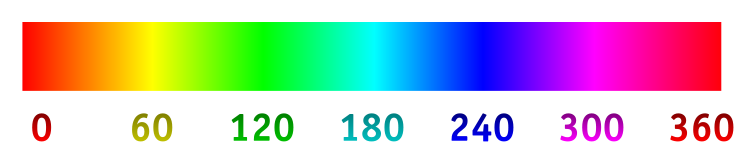

In [ ]:
target_hue = 120

# dzielimy na dwa, poniweaż opencv operuje na zakresie 0-179 hue
target_hue /= 2

Zmiana do HSV -> rotacja -> zmiana do RGB -> wyczyszczenie artefaktów maską

In [ ]:
hsvSegment = cv2.cvtColor(segment, cv2.COLOR_RGB2HSV)
print("Segment w przestrzeni HSV")
cv2_imshow(hsvSegment)


# Obliczanie wymaganej rotacji
n_samp = mask8.sum() / mask8.max()
sum_hue = hsvSegment[:,:,0].sum()
avg_hue = sum_hue/n_samp

if avg_hue > target_hue:
  rotation = -(avg_hue-target_hue)
else:
  rotation = target_hue - avg_hue


# rotation można też podać jako wartość stałą
# rotation = 20

hsvRotatedSegment = hsvSegment.copy()
# rotacja koloru
shape = hsvSegment.shape
for i in range(shape[0]):
  for j in range(shape[1]):
    hsvRotatedSegment[i,j,0] = (hsvSegment[i,j,0] + rotation) % 181

print("Segment w przestrzeni HSV po rotacji Hue")
cv2_imshow(hsvRotatedSegment)

rgbSegment = cv2.cvtColor(hsvRotatedSegment, cv2.COLOR_HSV2RGB)
rgbSegment = cv2.bitwise_and(rgbSegment, rgbSegment, mask=mask8)
print("Segment w przestrzeni RGB po rotacji Hue")
cv2_imshow(rgbSegment)

Nałożenie pokolorowanego segmentu na obraz

In [ ]:
# odwrócenie maski
inverted_mask8 = cv2.bitwise_not(mask8).astype(np.uint8)

# obraz z wyciętym kołem (tło) - koło wyzerowane
im_bg = cv2.bitwise_and(im, im, mask=inverted_mask8)

# Suma obrazków
dst = cv2.add(im_bg, rgbSegment)

# wyświetlenie
cv2_imshow(dst)

# zapis do pliku
cv2.imwrite("colored_car.png", dst)